In [49]:
# Code you have previously used to load data
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier 
import matplotlib.pyplot as plt
import seaborn as sns


# Path of the file to read
iowa_file_path = 'KaggleV2-May-2016.csv'

patient_data = pd.read_csv(iowa_file_path)
print(patient_data.info())
print(patient_data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0       PatientId   110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB
None
       PatientId  AppointmentID Gender          ScheduledDay  \
0   2.987250e+13     

In [50]:
print(patient_data.isnull().sum())

    PatientId     0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


In [51]:
print(patient_data.describe())

           PatientId  AppointmentID            Age    Scholarship  \
count   1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean    1.474963e+14   5.675305e+06      37.088874       0.098266   
std     2.560949e+14   7.129575e+04      23.110205       0.297675   
min     3.921784e+04   5.030230e+06      -1.000000       0.000000   
25%     4.172614e+12   5.640286e+06      18.000000       0.000000   
50%     3.173184e+13   5.680573e+06      37.000000       0.000000   
75%     9.439172e+13   5.725524e+06      55.000000       0.000000   
max     9.999816e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.0000

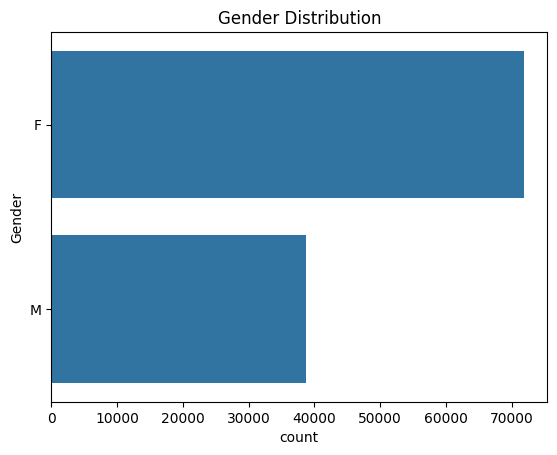

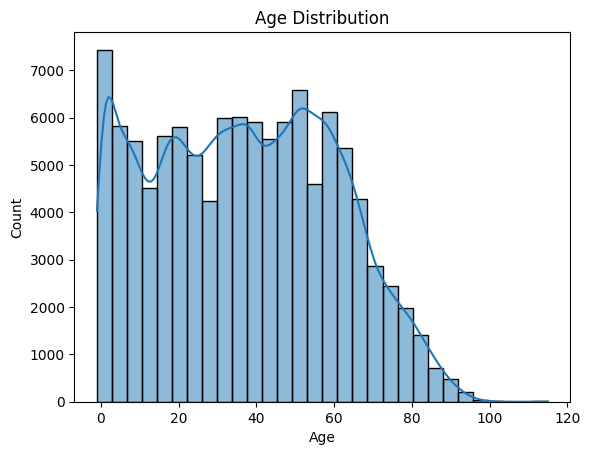

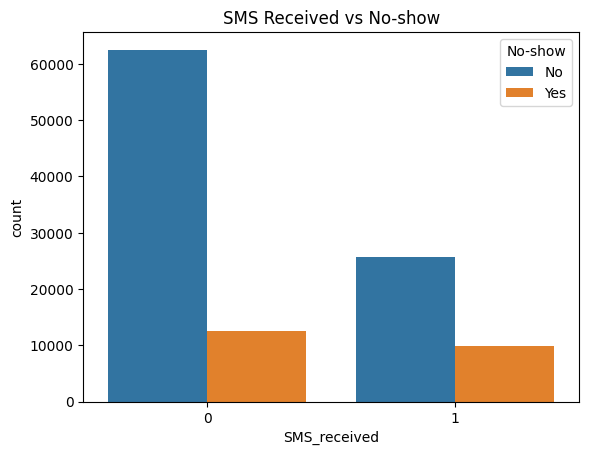

In [52]:
# Gender distribution
sns.countplot(patient_data["Gender"])
plt.title("Gender Distribution")
plt.show()

# Age distribution
sns.histplot(patient_data["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# SMS received vs No-show
sns.countplot(x="SMS_received", hue="No-show", data=patient_data)
plt.title("SMS Received vs No-show")
plt.show()


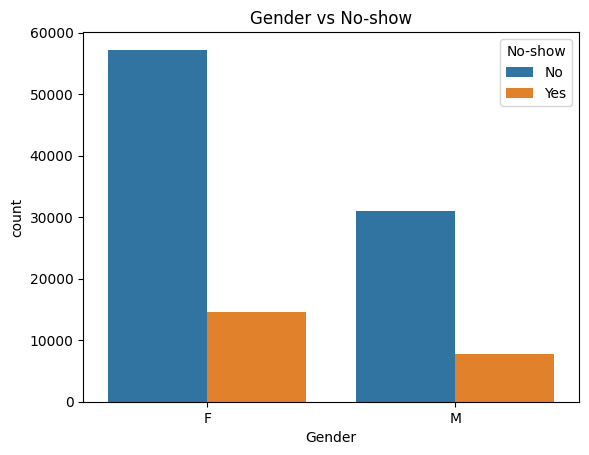

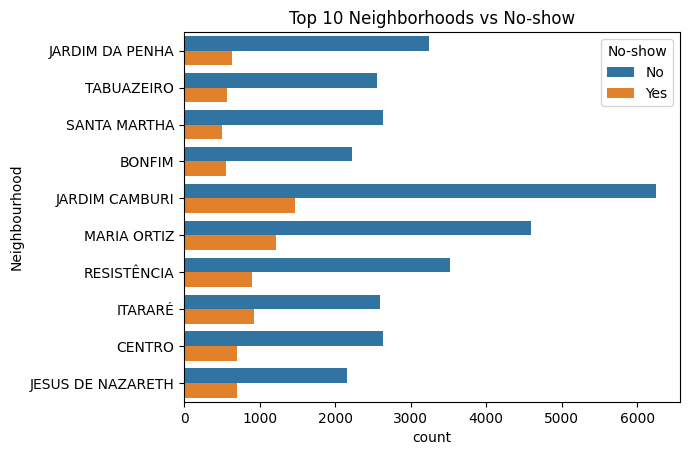

In [53]:
# Gender vs No-show
sns.countplot(x="Gender", hue="No-show", data=patient_data)
plt.title("Gender vs No-show")
plt.show()

# Neighborhood vs No-show (Top 10 neighborhoods)
top_10_neighborhoods = patient_data["Neighbourhood"].value_counts().head(10).index
sns.countplot(
    y="Neighbourhood",
    hue="No-show",
    data=patient_data[patient_data["Neighbourhood"].isin(top_10_neighborhoods)],
)
plt.title("Top 10 Neighborhoods vs No-show")
plt.show()


In [54]:
# Convert 'Gender' to binary: Male = 1, Female = 0
patient_data["Gender"] = patient_data["Gender"].replace({"M": 1, "F": 0})

# Convert 'No-show' to binary: Yes = 1 (No-show), No = 0 (Showed up)
patient_data["No-show"] = patient_data["No-show"].replace({"Yes": 1, "No": 0})
print(patient_data.columns)
# Drop irrelevant columns
patient_data = patient_data.drop(["    PatientId", "AppointmentID", "ScheduledDay", "AppointmentDay", "Neighbourhood"], axis=1)

# Check for negative ages (clean if necessary)
patient_data = patient_data[patient_data["Age"] >= 0]

Index(['    PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')


C:\Users\Khang\AppData\Local\Temp\ipykernel_12004\4187391661.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  patient_data["Gender"] = patient_data["Gender"].replace({"M": 1, "F": 0})
C:\Users\Khang\AppData\Local\Temp\ipykernel_12004\4187391661.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  patient_data["No-show"] = patient_data["No-show"].replace({"Yes": 1, "No": 0})


In [55]:
X = patient_data.drop(["No-show"], axis=1)
y = patient_data["No-show"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [56]:
import numpy as np
from sklearn.model_selection import cross_validate

# Define the Decision Tree model
model = DecisionTreeClassifier(random_state=42)

# Perform 10-fold cross-validation
cv_results = cross_validate(
    model,
    X,
    y,
    cv=10,
    scoring=["precision", "recall", "f1", "roc_auc"],
    return_train_score=False,
)

# Print cross-validation metrics
print(f"Precision: {np.mean(cv_results['test_precision']):.2f}")
print(f"Recall: {np.mean(cv_results['test_recall']):.2f}")
print(f"F1-Score: {np.mean(cv_results['test_f1']):.2f}")
print(f"AUC: {np.mean(cv_results['test_roc_auc']):.2f}")


Precision: 0.32
Recall: 0.01
F1-Score: 0.03
AUC: 0.59


Precision: 0.33
Recall: 0.02
F1-Score: 0.03
AUC: 0.59


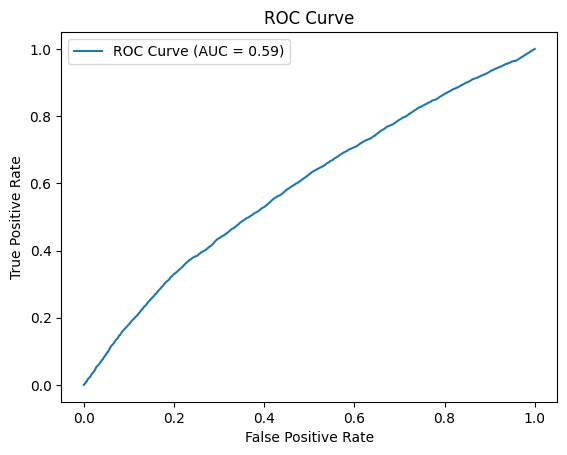

In [57]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# Train the model
model.fit(X_train, y_train)

# Predict probabilities for ROC curve
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"AUC: {auc:.2f}")

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.2f})".format(auc))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()